In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Import data
ages = ['UNDER5', 'AGE517', 'AGE1829', 'AGE4049', 'AGE3039', 'AGE5064', 'AGE6574', 'AGE75PLUS']
morris = 'figures_morris'
morris_small = 'figures_morris_small'
morris_ideal = 'figures_morris_ideal'
modified = 'figures_morris_mod'
modified_all = 'figures_morris_mod_all'

data_left = []
data_right = []
data_ideal = []
data_mod_all = []
for i in range(len(ages)):
    x_left = pd.read_csv('./results/' + ages[i] + '/' + morris_small + '/Morris.csv')
    data_left.append(x_left)
    x_right = pd.read_csv('./results/' + ages[i] + '/' + morris + '/Morris.csv')
    data_right.append(x_right)
    x_ideal = pd.read_csv('./results/' + ages[i] + '/' + morris_ideal + '/Morris.csv')
    data_ideal.append(x_ideal)
    x_mod_all = pd.read_csv('./results/' + ages[i] + '/' + modified_all + '/Morris.csv')
    data_mod_all.append(x_mod_all)
    
    
age_left = []
age_right = []
age_ideal = []
age_all = []
# Age 
for i in range(len(ages)):
    age_left.append(data_left[i][data_left[i].Feature == ages[i]])
    age_right.append(data_right[i][data_right[i].Feature == ages[i]])
    age_ideal.append(data_ideal[i][data_ideal[i].Feature == ages[i]])
    age_all.append(data_mod_all[i][data_mod_all[i].Feature == ages[i]])
    
#vaccination = []
# Vaccination
#for i in range(len(ages)):
#    vaccination.append(data[i][data[i].Feature == 'VaccinationFull'])

In [7]:
age_total = []
for i in range(len(ages)):
    age_total.append(pd.concat([age_left[i], age_right[i]], ignore_index=True))

In [ ]:
[2e-06, 4e-06, 6e-06, 8e-06, 1e-05, 2e-05, 4e-05, 6e-05, \
 8e-05, 1e-04, 2e-04, 4e-04, 6e-04, 8e-04, 1e-03, 2e-03, \
 4e-03, 6e-03, 8e-03, 1e-02]

In [ ]:
age_total[0].Delta.values

In [ ]:
age_total

In [8]:
# Function for formatter
import matplotlib
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

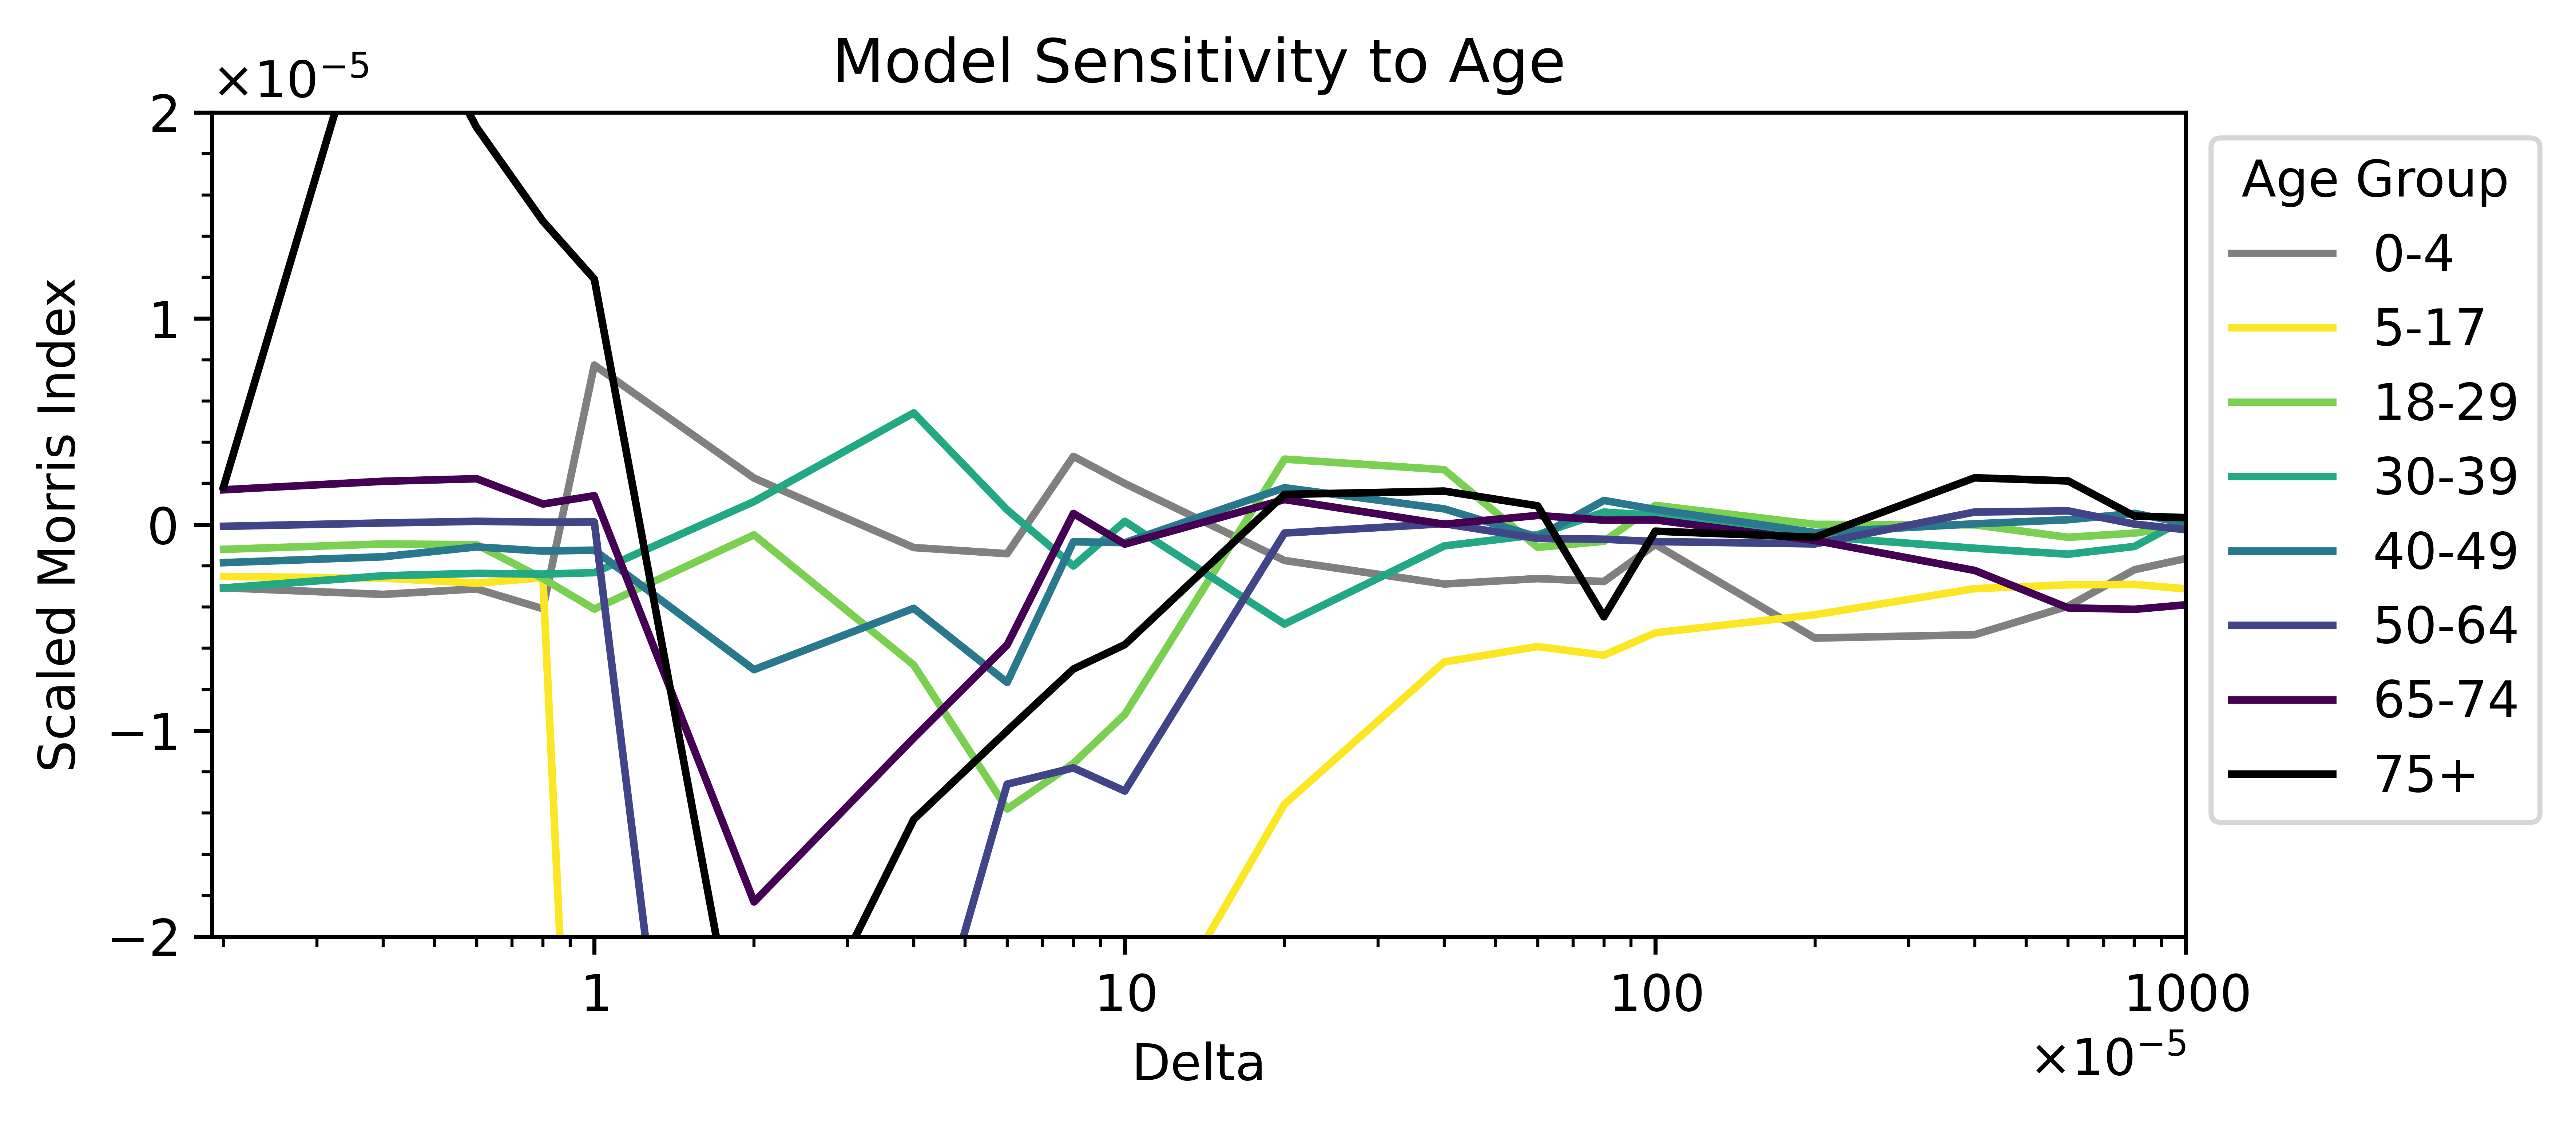

In [18]:
# Plot
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mpl.rcParams['figure.dpi'] = 1000
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '40-49', '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#7ad151', '#22a884', '#2a788e', '#414487', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    plt.plot(age_all[i].Delta, age_all[i].Morris_sensitivity, '-', linewidth=1.5, label=label[i], color=color[i])
    

# Scale axes
plt.xscale('log', base=10)
ax.yaxis.set_major_formatter(OOMFormatter(-5, "%1.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))   
ax.xaxis.set_major_formatter(OOMFormatter(-5, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-5,-5))
ax.xaxis.get_offset_text().set_visible(True)

# Vertical lines
#plt.axvline(x=10e-5, linestyle='--', color='gray')
#plt.axvline(x=100e-5, linestyle='--', color='gray')

# Format plot
ax.set_xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
#ax.set_yticks([0, 4e-4, 8e-4, 12e-4, 16e-4, 20e-4])
ax.set_xlim(1.9e-6, 10e-3)
ax.set_ylim(-2e-5, 2e-5)

# Minor ticks
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# Add labels
plt.ylabel('Scaled Morris Index')
plt.xlabel('Delta')
plt.title('Model Sensitivity to Age')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
#plt.savefig('age.png', bbox_inches='tight')
plt.show()

In [ ]:
# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '40-49', '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#7ad151', '#22a884', '#2a788e', '#414487', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    plt.plot(age_ideal[i].Delta, age_ideal[i].Morris_sensitivity, '-', linewidth=1.5, label=label[i], color=color[i])
    
# Scale axes
ax.yaxis.set_major_formatter(OOMFormatter(-5, "%1.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))   
ax.xaxis.set_major_formatter(OOMFormatter(-5, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-5,-5))
ax.xaxis.get_offset_text().set_visible(True)

# Format plot
ax.set_xticks([10e-5, 20e-5, 30e-5, 40e-5, 50e-5, 60e-5, 70e-5, 80e-5, 90e-5, 100e-5])
ax.set_yticks([0, 4e-4, 8e-4, 12e-4, 16e-4, 20e-4])
ax.set_xlim(10e-5, 100e-5)
ax.set_ylim(20e-5, 85e-5)

# Minor ticks
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# Add labels
plt.ylabel('Scaled Morris Index')
plt.xlabel('Delta')
plt.title('Model Sensitivity to Age')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.savefig('age_detailed.png', bbox_inches='tight')
plt.show()

In [ ]:
# Plot
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '40-49',  '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#7ad151', '#22a884', '#2a788e', '#414487', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    ax.plot(vaccination[i].Delta, vaccination[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
    ax2.plot(vaccination[i].Delta, vaccination[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
        
# Scale axes
ax.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
ax.xaxis.get_offset_text().set_visible(False)

ax2.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax2.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4)) 
    
# Format plot
ax.set_xticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001])
ax.set_yticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001])
ax.set_xlim(0.00017,0.001)
ax.set_ylim(0.0001,0.0011)
ax2.set_xticks([0.002, 0.004, 0.006, 0.008, 0.01])
ax2.set_xlim(0.001,0.0103)

# Split both plots by "/"
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.tick_params(labelleft='off')
ax2.tick_params(left = False)
d = .018 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# Add labels
ax.set_ylabel('Scaled Morris Index')
fig.suptitle('Model Sensitivity to Vaccination by Age Group')
#fig.supxlabel('Delta', y=-0.025)
ax2.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('vaccination.png', bbox_inches='tight')
plt.show()